In [2]:
import os

if os.path.isfile('"Downloads"'):
    print('The file is present.')
else:
    print('The file is not present.')

The file is not present.


In [3]:
os.getcwd()

'C:\\Users\\caroline.ohagan\\Downloads'

In [4]:
%run ./startup_file.ipynb #run startup file and install libraries if necessary

# Water Masses

## Author: caroline OHagan

##### *Last run on 2024-06-24*

In [5]:
os.chdir(data_dir) #cd to data directory 
#create new project data folder 
proj_data = '/Water Masses' #name of project
data_dir_fold = data_dir+proj_data #path for new folder 
isexist = os.path.exists(data_dir_fold) #check if path exists 
#print(isexist)
if str(isexist) == 'False': #if path doesn't exist already, make it
    os.mkdir(data_dir_fold)


os.chdir(data_dir_fold) #go to project data folder
os.getcwd() #check if in the correct folder

'C:\\users\\caroline.OHagan\\Documents\\INTERN_PROJECT_2024\\DATA\\Water Masses'

In [27]:
#url = ''.join(['https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_seascapes_8day.nc?',
#               'CLASS',
#               '%5B(2022-01-01T12:00:00Z):1:(2022-12-31T12:00:00Z)%5D',
#               '%5B(46.362305):1:(34.40918)%5D%5B(-63.585942):1:(-77.681645)%5D,P%5B(2022-01-01T12:00:00Z):1:(2022-12-31T12:00:00Z)%5D%5B(46.362305):1:(34.40918)%5D%5B(-63.585942):1:(-77.681645)%5D'
#               ]) 

start_date = '2023-08-20' #(yyyy-mm-dd format)
end_date = '2023-12-31'
url = ''.join(['https://www.oceancolour.org/thredds/ncss/CCI_ALL-v6.0-8DAY?var=water_class1&var=water_class10&var=water_class11&var=water_class12&var=water_class13&var=water_class14&var=water_class2&var=water_class3&var=water_class4&var=water_class5&var=water_class6&var=water_class7&var=water_class8&var=water_class9&north=46.362305&west=-77.681645&east=-63.585942&south=34.40918&horizStride=1&time_start='+start_date+'T00%3A00%3A00Z&time_end='+end_date+'T00%3A00%3A00Z&timeStride=1&accept=netcdf']) 
#url=''.join(['https://coastwatch.noaa.gov/erddap/griddap/noaacwLEOACSPOSSTL3SnrtKDaily.nc?sea_surface_temperature%5B(2022-08-20T12:00:00Z):1:(2022-12-31T12:00:00Z)%5D%5B(46.362305):1:(34.4091)%5D%5B(-63.585942):1:(-77.681645)%5D'])
#def url2date(url, nu): #write function to grab the start and end dates of the data inquiry to use them for naming our data file
#    s_dat = url.split('(')
#    s_dat = s_dat[nu].split('T')
#    s_dat = s_dat[0].split('-')
#    s_dat = s_dat[0]+s_dat[1]+s_dat[2]
#    return(s_dat)
def url2date(url, nu): #write function to grab the start and end dates of the data inquiry to use them for naming our data file
    dat = url.split('(')
    s_dat = [s for s in dat if nu in s]
    
    s_dat = s_dat[0].split('T')
    #s_dat = s_dat[0].split('-')
    s_dat = s_dat[0].split('=')
    s_dat=s_dat[1]
    #s_dat = s_dat[0]+s_dat[1]+s_dat[2]
    return(s_dat)

s_date = url2date(url,nu=start_date) # for start date: nu = 1
e_date = url2date(url,nu=end_date) #for end date: nu = 2   
fname = "/DD8_" + s_date + '_'+ e_date + ".nc" #create unique filename 
#follow kims naming structure 
#DD8_yyyymmdd_yyyymmdd start end dates #write function to get that parts of URL 
file = data_dir_fold+fname
urllib.request.urlretrieve(url, file) #download data

('/users/caroline.OHagan/Documents/INTERN_PROJECT_2024/DATA/Water Masses/DD8_water_class1&var_water_class1&var.nc',
 <http.client.HTTPMessage at 0x2989ef18490>)

In [28]:
ds = xr.open_dataset(file, decode_cf=True) #open nc file 
ds #inspect xarray dataset

<xarray.Dataset>
Dimensions:        (time: 17, lat: 288, lon: 339)
Coordinates:
  * time           (time) datetime64[ns] 2023-08-21 2023-08-29 ... 2023-12-27
  * lat            (lat) float64 46.35 46.31 46.27 46.23 ... 34.48 34.44 34.4
  * lon            (lon) float64 -77.69 -77.65 -77.6 ... -63.69 -63.65 -63.6
Data variables: (12/14)
    water_class1   (time, lat, lon) float32 ...
    water_class10  (time, lat, lon) float32 ...
    water_class11  (time, lat, lon) float32 ...
    water_class12  (time, lat, lon) float32 ...
    water_class13  (time, lat, lon) float32 ...
    water_class14  (time, lat, lon) float32 ...
    ...             ...
    water_class4   (time, lat, lon) float32 ...
    water_class5   (time, lat, lon) float32 ...
    water_class6   (time, lat, lon) float32 ...
    water_class7   (time, lat, lon) float32 ...
    water_class8   (time, lat, lon) float32 ...
    water_class9   (time, lat, lon) float32 ...
Attributes: (12/51)
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creator_email:                     help@esa-oceancolour-cci.org
    creator_name:                      Plymouth Marine Laboratory
    ...                                ...
    time_coverage_duration:            P8D
    start_date:                        21-MAR-2024 00:00:00.000000
    stop_date:                         28-MAR-2024 23:59:00.000000
    time_coverage_start:               202403210000Z
    time_coverage_end:                 202403282359Z
    History:                           Translated to CF-1.0 Conventions by Ne...

In [31]:
# List the coordinates
print('The coordinates variables:', list(ds.coords), '\n')

# List the data variables
print('The data variables:', list(ds.data_vars))

# Check how many files were downloaded 
num_files = len(ds.water_class1)
num_files = len(ds.water_class10)
num_files = len(ds.water_class11)
num_files = len(ds.water_class12)
num_files = len(ds.water_class13)
num_files = len(ds.water_class14)
num_files = len(ds.water_class2)
num_files = len(ds.water_class3)
num_files = len(ds.water_class4)
num_files = len(ds.water_class5)
num_files = len(ds.water_class6)
num_files = len(ds.water_class7)
num_files = len(ds.water_class8)
num_files = len(ds.water_class9)
print('Number of files downloaded:', num_files)

The coordinates variables: ['time', 'lat', 'lon'] 

The data variables: ['water_class1', 'water_class10', 'water_class11', 'water_class12', 'water_class13', 'water_class14', 'water_class2', 'water_class3', 'water_class4', 'water_class5', 'water_class6', 'water_class7', 'water_class8', 'water_class9']
Number of files downloaded: 17


TypeError: isnan() takes from 1 to 2 positional arguments but 14 were given

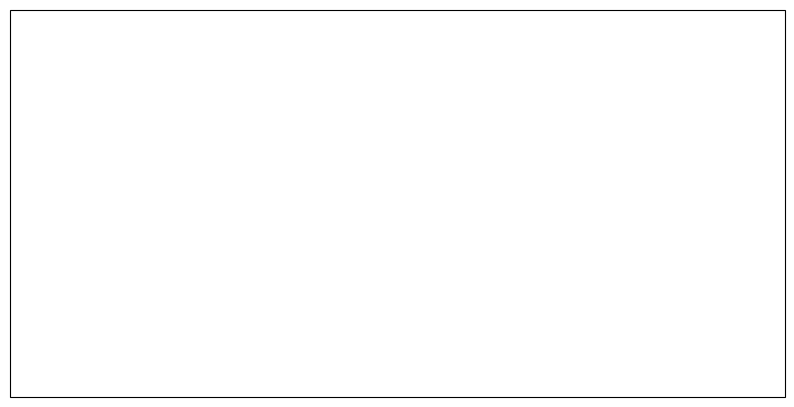

In [36]:
for x in range(num_files):
    fig = plt.figure(figsize=(10, 7)) #set figure size
    map_projection = cartopy.crs.PlateCarree() #set map projection
    ax = plt.axes(projection=map_projection) 
    wnonan_nonan = ds.water_class1[x,:,:],ds.water_class10[x,:,:], ds.water_class11[x,:,:], ds.water_class12[x,:,:], ds.water_class13[x,:,:], ds.water_class14[x,:,:], ds.water_class2[x,:,:], ds.water_class3[x,:,:], ds.water_class4[x,:,:], ds.water_class5[x,:,:], ds.water_class6[x,:,:], ds.water_class7[x,:,:], ds.water_class8[x,:,:], ds.water_class9[x,:,:].values[~np.isnan(ds.water_class1[x],ds.water_class10[x], ds.water_class11[x], ds.water_class12[x], ds.water_class13[x], ds.water_class14[x], ds.water_class2[x], ds.water_class3[x], ds.water_class4[x], ds.water_class5[x], ds.water_class6[x], ds.water_class7[x], ds.water_class8[x], ds.water_class9[x].values)]
    wnonan_max = np.amax(wnonan_nonan)
    im = ax.pcolormesh(ds.lon, ds.lat,ds.water_class1[x,:,:],ds.water_class10[x,:,:], ds.water_class11[x,:,:], ds.water_class12[x,:,:], ds.water_class13[x,:,:], ds.water_class14[x,:,:], ds.water_class2[x,:,:], ds.water_class3[x,:,:], ds.water_class4[x,:,:], ds.water_class5[x,:,:], ds.water_class6[x,:,:], ds.water_class7[x,:,:], ds.water_class8[x,:,:], ds.water_class9[x,:,:], cmap = "jet" , vmin=0, vmax=wnonan_max) #set variables to plot
    ax.coastlines()
    ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)

    #ax.set_xticks(np.linspace(-78, -63.4, 5), crs=map_projection) #set latitude bounds 
    #ax.set_yticks(np.linspace(34.3, 47, 5), crs=map_projection) #set longitude bounds
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    plt.colorbar(im, label='water classes',) #colorbar title 
    
    plt.title("Water Classes:" + ' '+ds.time[x].dt.strftime('%Y-%m-%d').item()) #add title to plot

In [37]:
ds.water_class11

<xarray.DataArray 'water_class11' (time: 17, lat: 288, lon: 339)>
[1659744 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2023-08-21 2023-08-29 ... 2023-12-27
  * lat      (lat) float64 46.35 46.31 46.27 46.23 ... 34.52 34.48 34.44 34.4
  * lon      (lon) float64 -77.69 -77.65 -77.6 -77.56 ... -63.69 -63.65 -63.6
Attributes:
    paper_ref:    Thomas Jackson, Shubha Sathyendranath, Frederic Melin, (201...
    ref:          http://dx.doi.org/10.1016/j.rse.2009.07.016
    long_name:    Mean of normalised water class 11 membership over the compo...
    _ChunkSizes:  [  1 270 270]

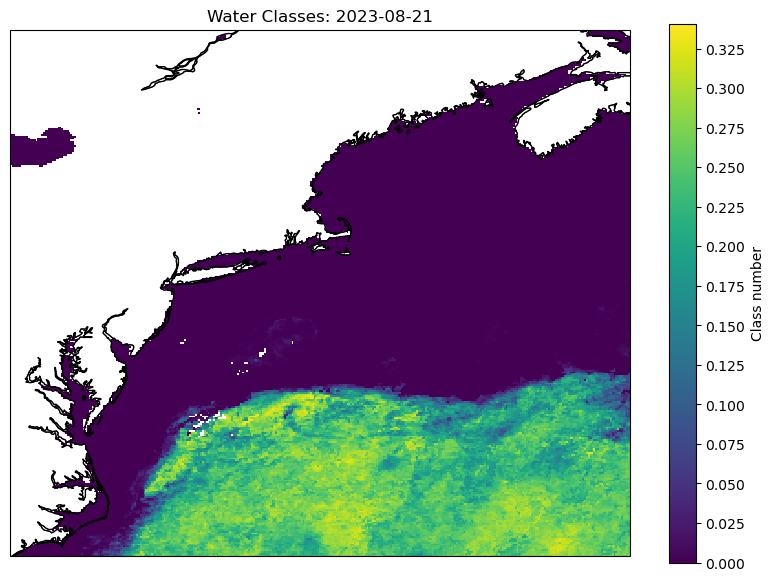

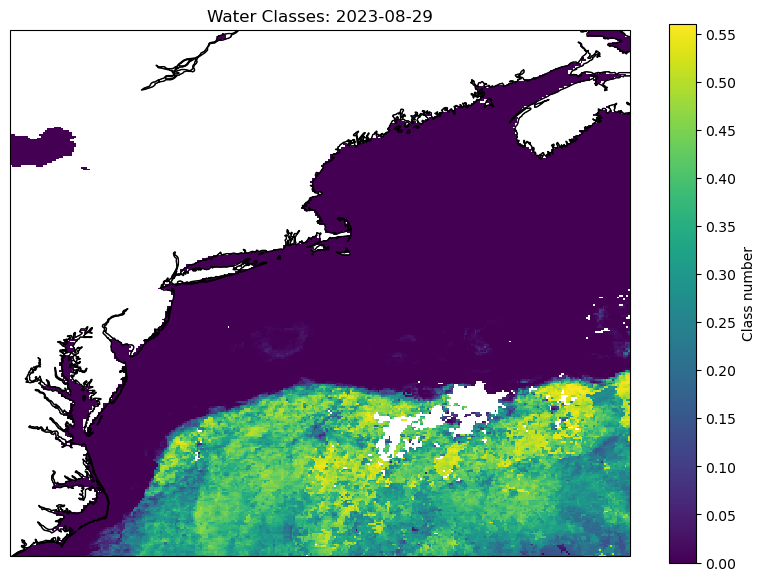

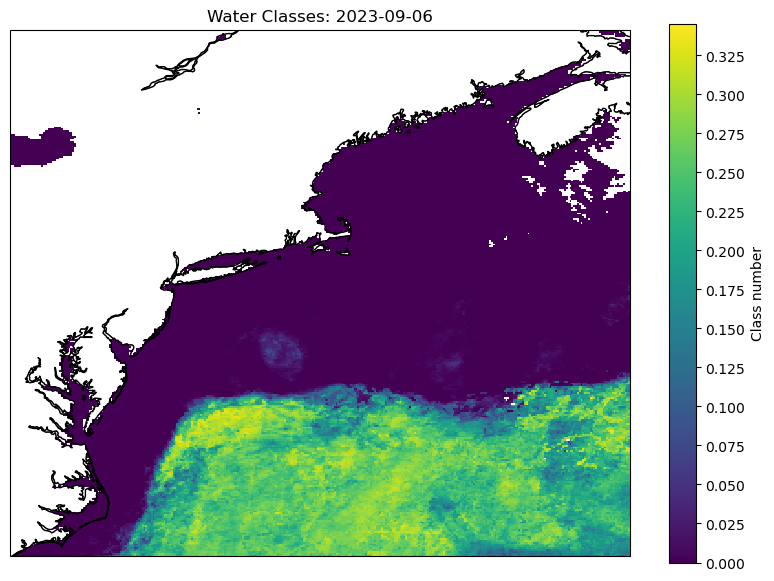

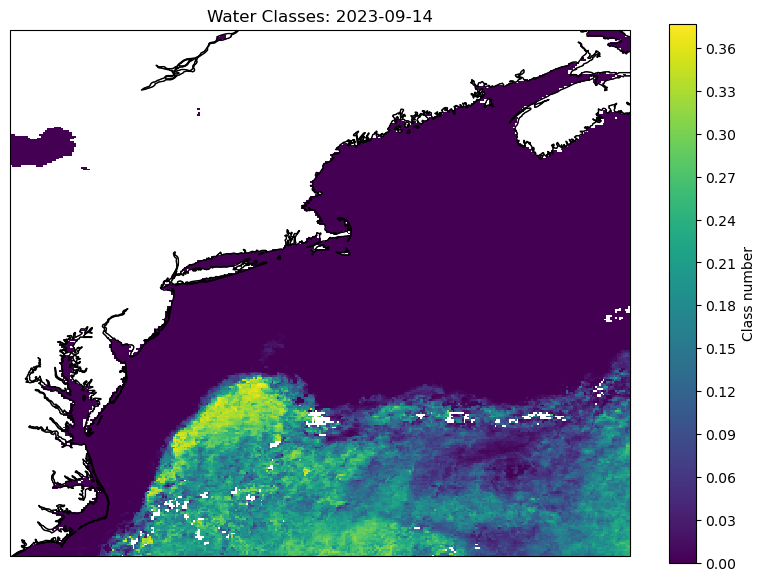

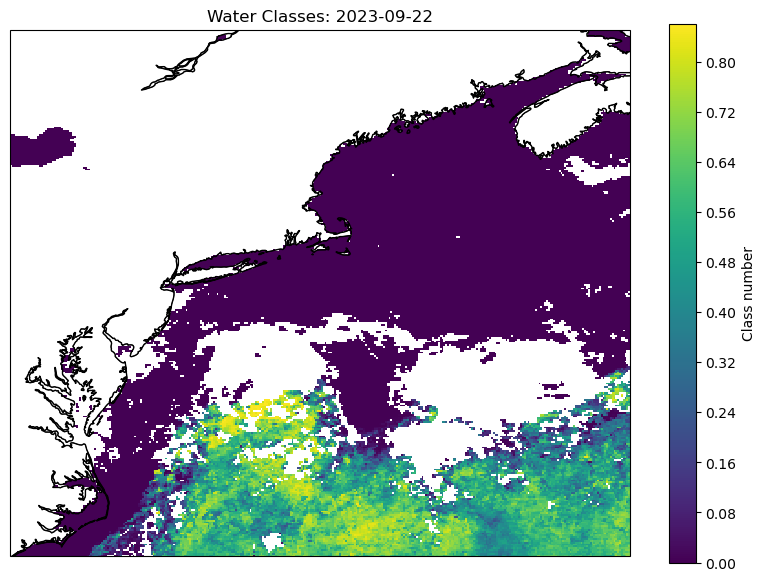

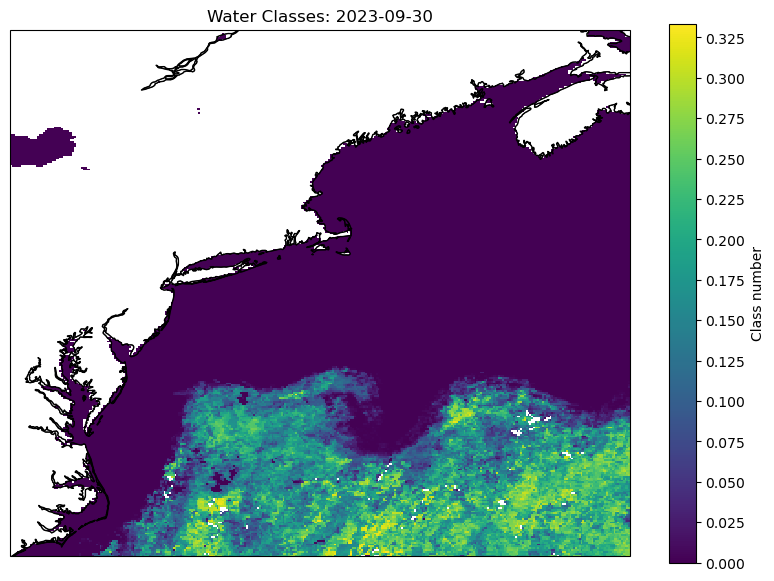

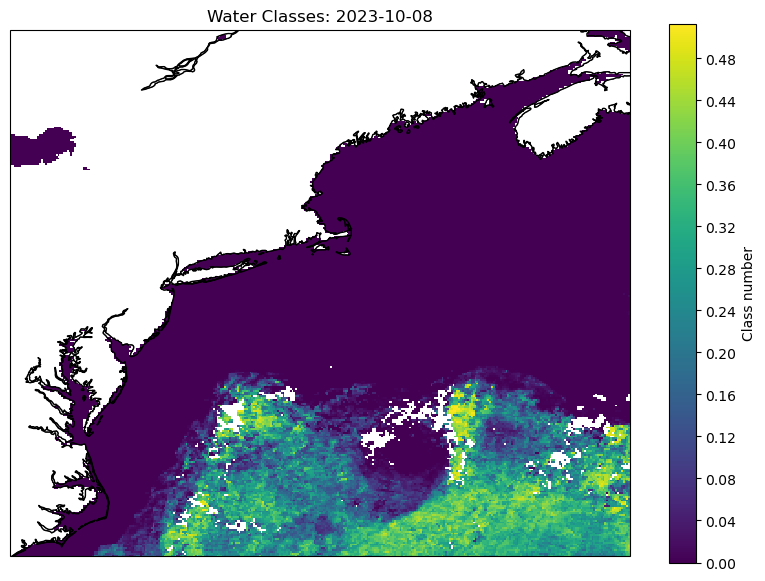

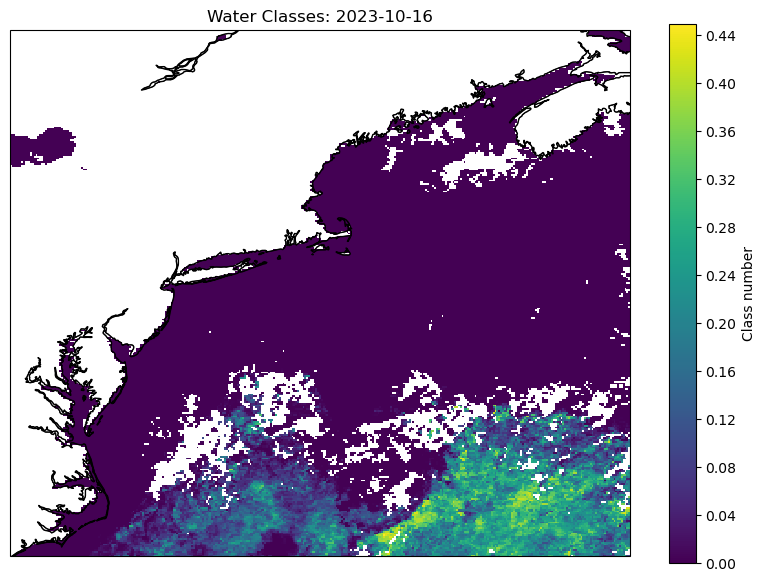

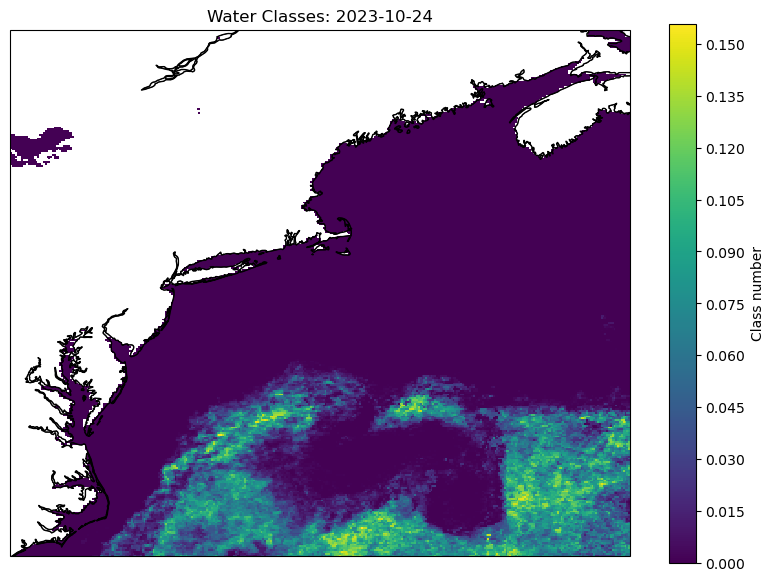

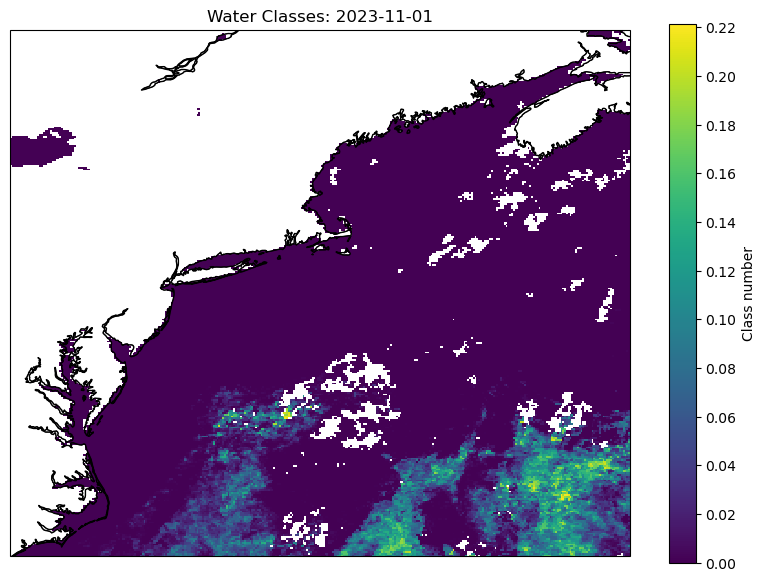

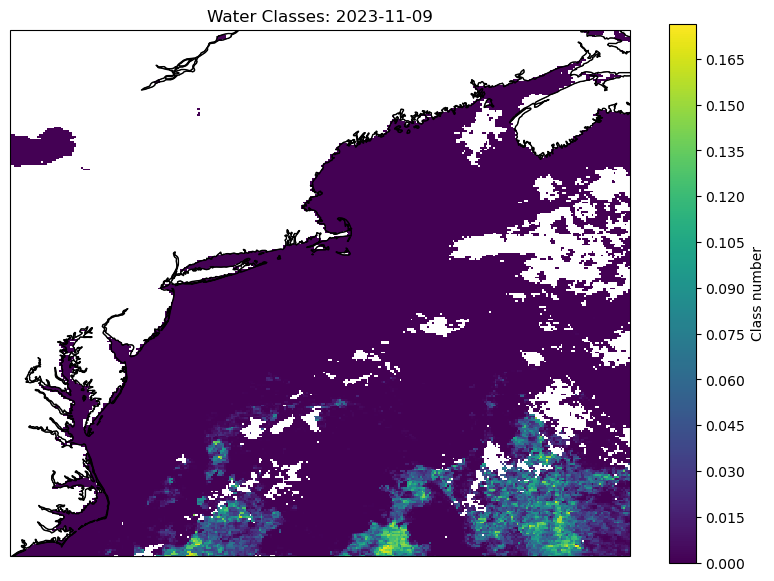

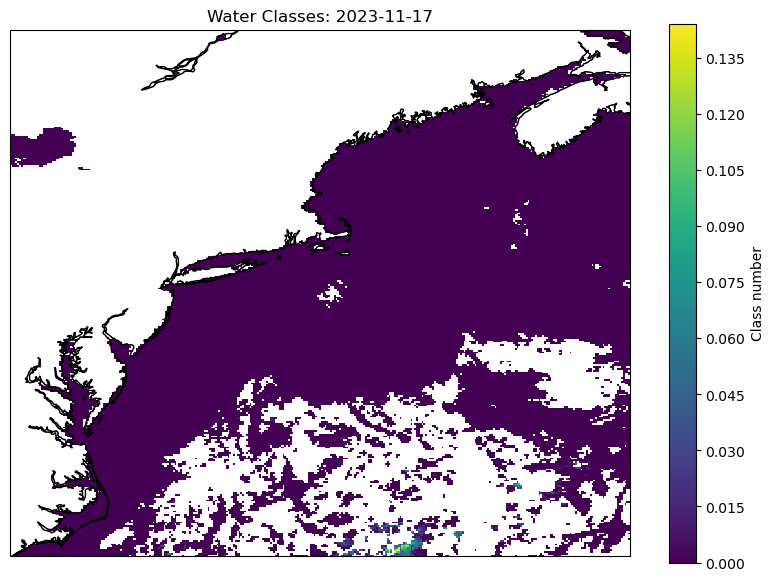

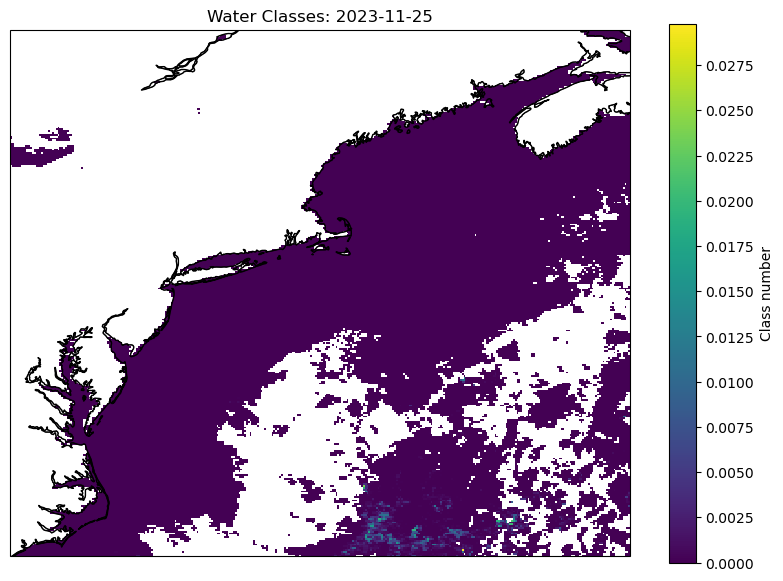

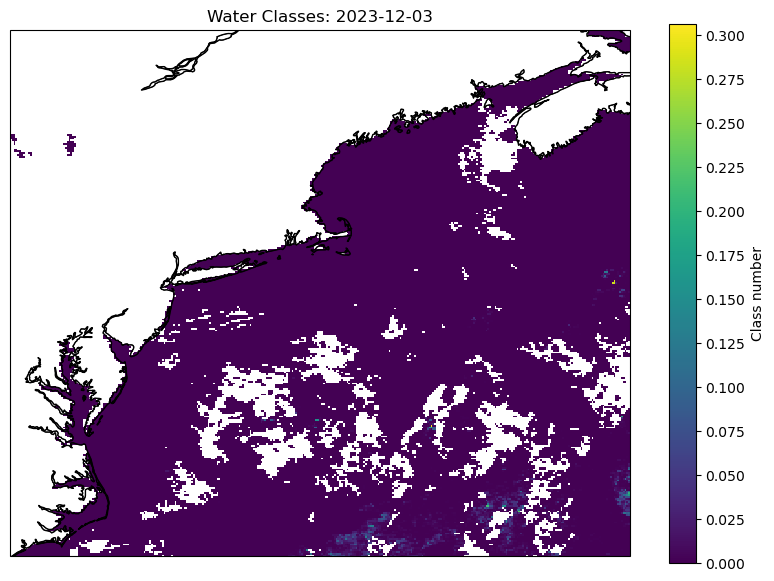

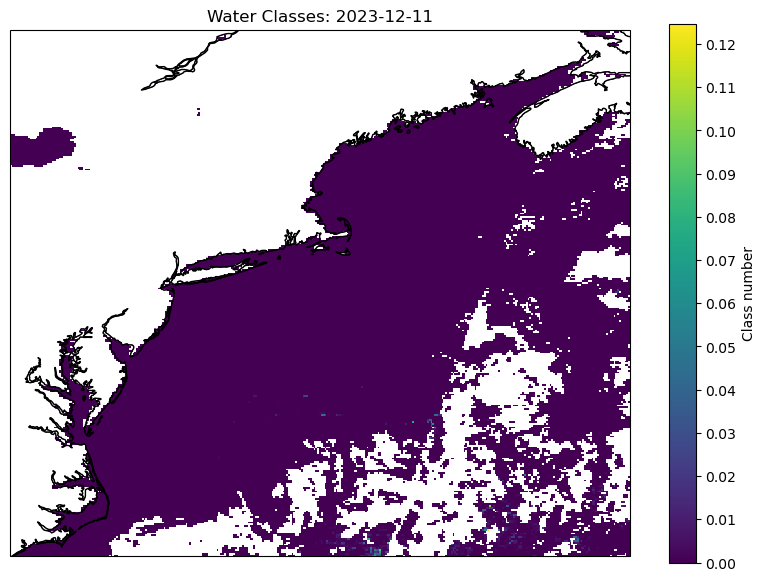

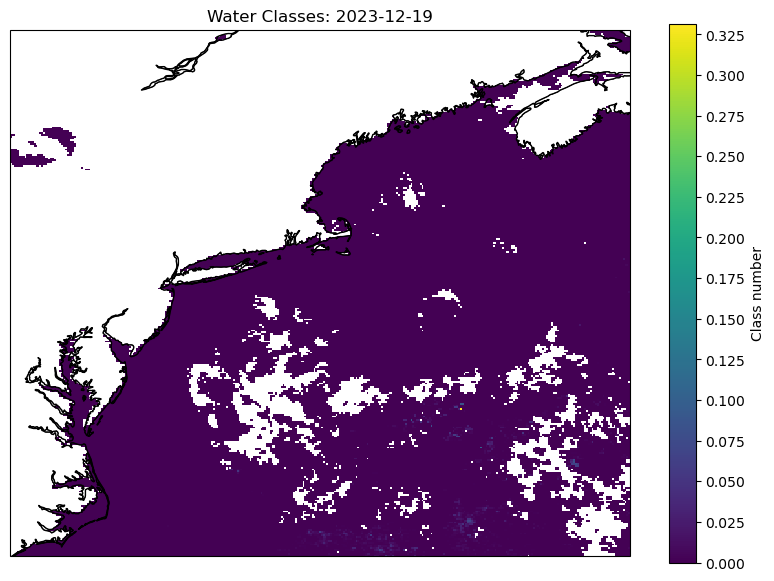

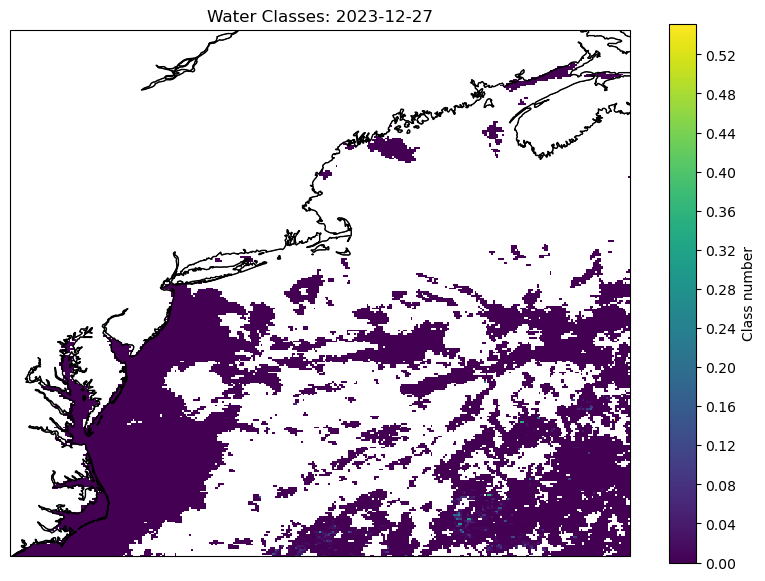

In [48]:
levs = np.arange(0, 13, 0.05) # Sets color breaks from 0 to 33 (the number of seascape classes) with 0.05 steps
jet = ["blue", "#007FFF", "cyan", "#7FFF7F",
       "yellow", "#FF7F00", "red", "#7F0000"]
for x in range(num_files):
    fig = plt.figure(figsize=(10, 7)) #set figure size
    map_projection = cartopy.crs.PlateCarree() #set map projection
    ax = plt.axes(projection=map_projection) 
    wnonan_nonan = ds.water_class1[x,:,:]
    wnonan_max = np.amax(wnonan_nonan)
    cm = LinearSegmentedColormap.from_list('my_jet', jet, N=14) #call colormap
    im = ax.pcolormesh(ds.lon, ds.lat,ds.water_class1[x,:,:]) #set variables to plot
    ax.pcolormesh(ds.lon, ds.lat,ds.water_class2[x,:,:]) #set variables to plot
    

    ax.coastlines()
    ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)

    #ax.set_xticks(np.linspace(-78, -63.4, 5), crs=map_projection) #set latitude bounds 
    #ax.set_yticks(np.linspace(34.3, 47, 5), crs=map_projection) #set longitude bounds
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    #plt.colorbar(im, label='water classes',) #colorbar title 
    cb = plt.colorbar(im, label='Class number',) #colorbar title 
    tick_locator = ticker.MaxNLocator(nbins=14) #set 33 ticks to colorbar (one for each seascape class) 
    cb.locator = tick_locator
    cb.update_ticks()
    
    plt.title("Water Classes:" + ' '+ds.time[x].dt.strftime('%Y-%m-%d').item()) #add title to plot